In [2]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

### <font color= green> Ajustad un modelo de Decision Tree a nuestros datos.

In [3]:
df_esta = pd.read_pickle("Datos/Travel_Insurance_esta_enco.pkl")
df_esta.head()

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,0.0,0.426113,-1.482446,0,1,0,0,4,1
1,0.0,0.426113,0.874835,1,1,0,0,5,0
2,1.0,1.453557,-1.205119,1,1,0,0,2,1
3,0.0,-0.601330,-0.650464,1,1,0,0,1,1
4,0.0,-0.601330,-0.650464,1,1,1,0,6,1


In [4]:
# separamos los datos en X e y

X1 = df_esta.drop("Travel_Insurance", axis = 1)
y1 = df_esta["Travel_Insurance"]

In [5]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [6]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)


DecisionTreeClassifier(random_state=0)

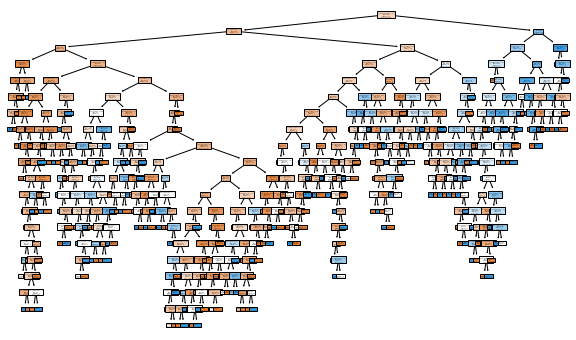

In [7]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show()

In [8]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 3. 

max_features = np.sqrt(len(x_train1.columns))
max_features

2.8284271247461903

In [9]:
# max depth

print(arbol.tree_.max_depth)

19


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [11]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [12]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.508380,0.297619,0.462963,0.362319,-0.007806,test,Decission Tree Esta I
1,0.978933,0.996296,0.950530,0.972875,0.955669,train,Decission Tree Esta I


In [13]:
# Cómo podemos ver tenemos overfitting así que tendremos que reducir la profundidad de nuestro modelo

In [14]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [2,4, 6, 10, 12], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 19. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2 y 3. Ponemos como límite el 3 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [15]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [16]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [17]:
# este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_leaf=10,
                       min_samples_split=100, random_state=42)

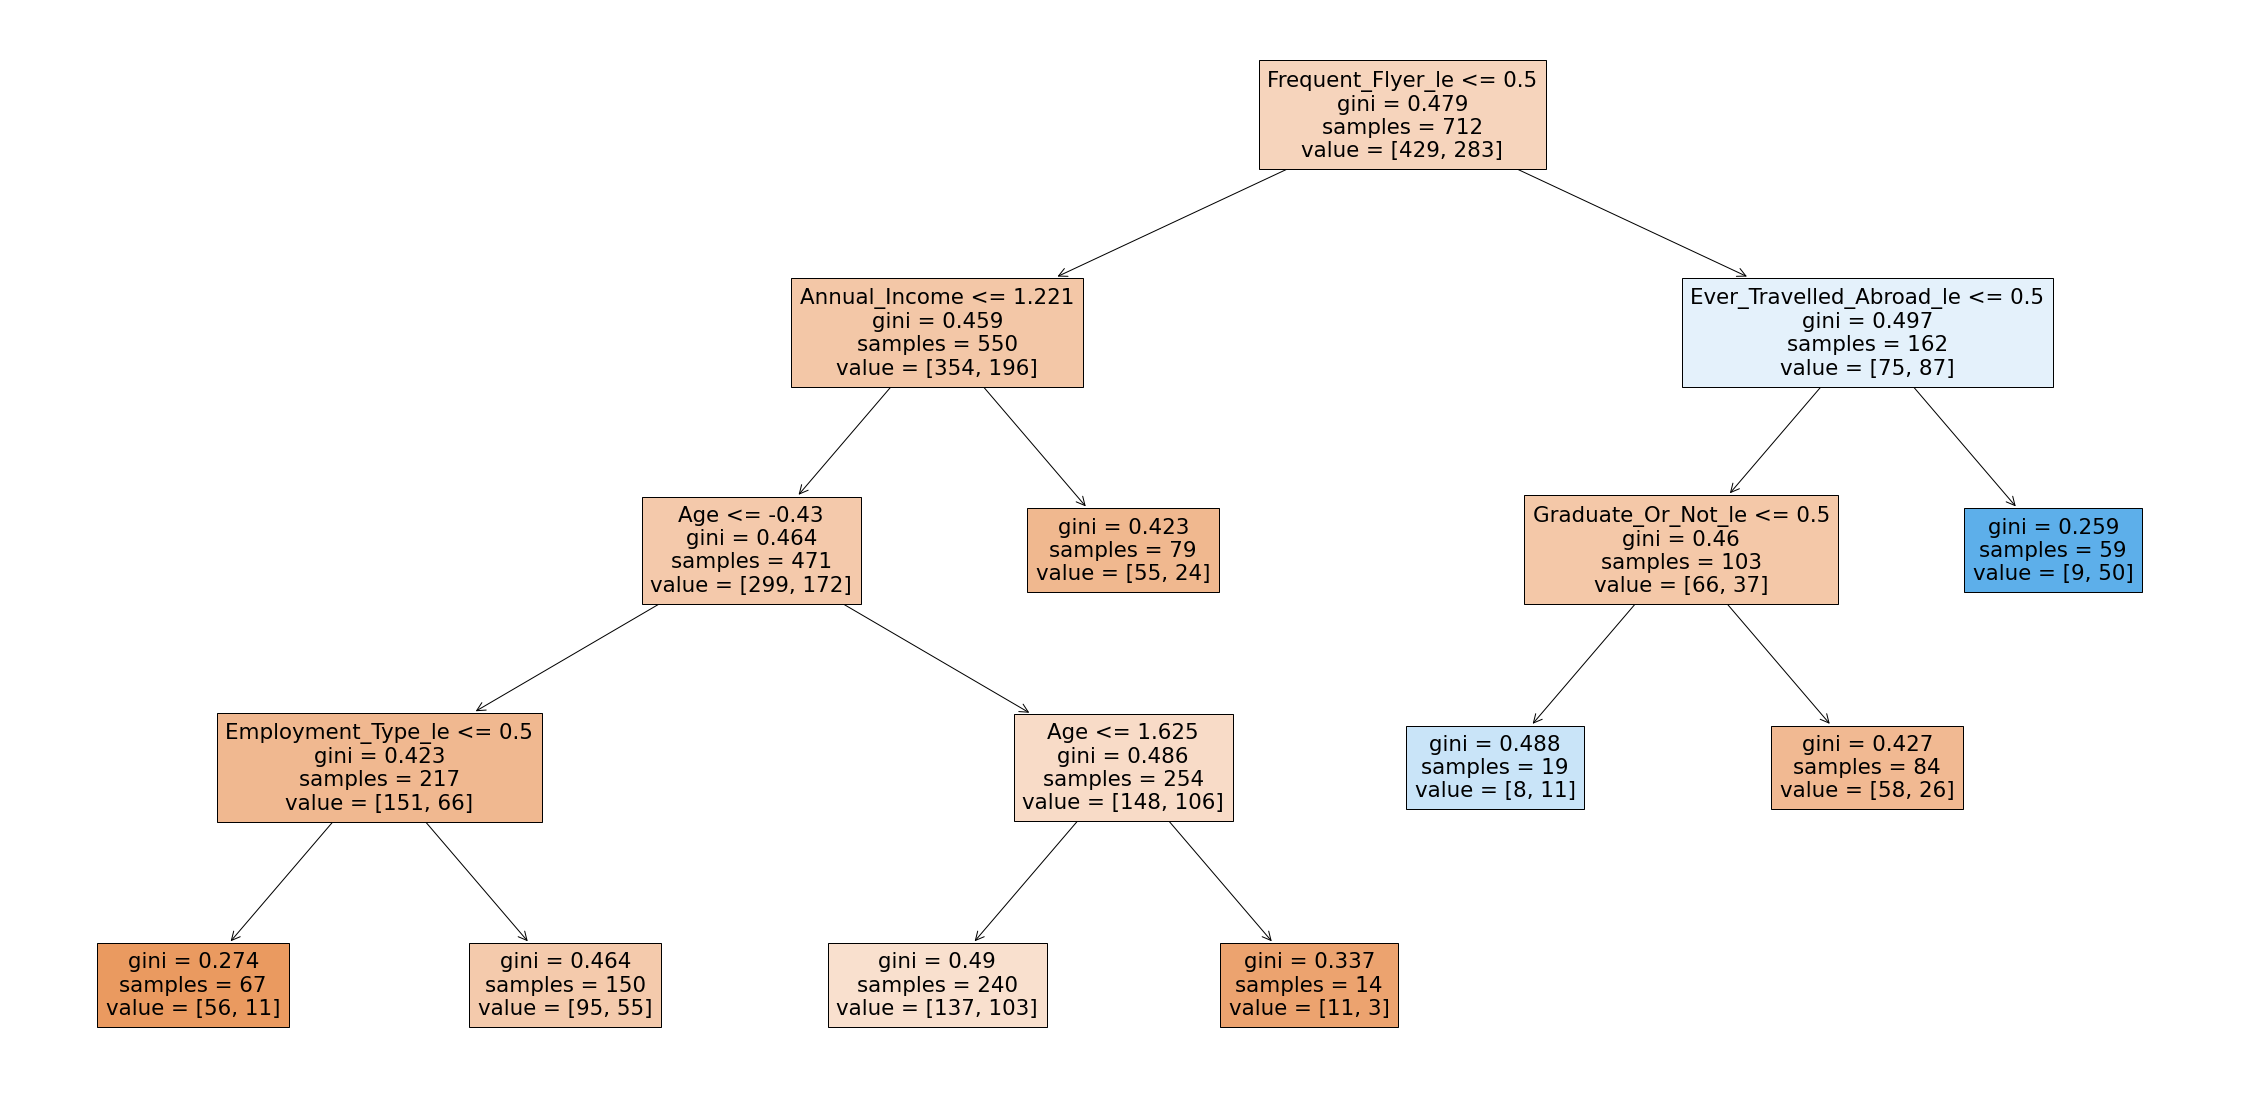

In [18]:
# veamos ahora que pinta tiene nuestro árbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

### <font color= green> Calculad las métricas a nuestro nuevo modelo.

In [19]:
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

In [20]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.737430,0.640000,0.296296,0.405063,0.264662,test,Decision tree Esta II
1,0.664326,0.782051,0.215548,0.337950,0.200654,train,Decision tree Esta II


In [21]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.508380,0.297619,0.462963,0.362319,-0.007806,test,Decission Tree Esta I
1,0.978933,0.996296,0.950530,0.972875,0.955669,train,Decission Tree Esta I
0,0.737430,0.640000,0.296296,0.405063,0.264662,test,Decision tree Esta II
1,0.664326,0.782051,0.215548,0.337950,0.200654,train,Decision tree Esta II


### <font color= green> Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [22]:
df_logistic_results = pd.read_pickle("resultados_Travel_Insurance_logistica.pkl")
df_logistic_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.600000,0.000000,0.000000,0.000000,0.000000,test,Regresión logistica
1,0.616617,0.000000,0.000000,0.000000,0.000000,train,Regresión logistica
0,0.698324,0.500000,0.370370,0.425532,0.227091,test,Regresión logistica Esta
1,0.695225,0.722973,0.378092,0.496520,0.307480,train,Regresión logistica Esta


In [23]:
# concatenamos todos los resultados

df_DT_LR_results = pd.concat([df_logistic_results, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.600000,0.000000,0.000000,0.000000,0.000000,test,Regresión logistica
1,0.616617,0.000000,0.000000,0.000000,0.000000,train,Regresión logistica
2,0.698324,0.500000,0.370370,0.425532,0.227091,test,Regresión logistica Esta
3,0.695225,0.722973,0.378092,0.496520,0.307480,train,Regresión logistica Esta
4,0.508380,0.297619,0.462963,0.362319,-0.007806,test,Decission Tree Esta I
5,0.978933,0.996296,0.950530,0.972875,0.955669,train,Decission Tree Esta I
6,0.737430,0.640000,0.296296,0.405063,0.264662,test,Decision tree Esta II
7,0.664326,0.782051,0.215548,0.337950,0.200654,train,Decision tree Esta II


los que tienen mejor resultado son el de regrsión logistica estadistica y el decisión tree 2, así que vamos a eliminar los dos peores para guardar únicamente con los que nos dan "mejor resultado"

In [24]:
df_DT_LR_results.drop([0,1,4,5], axis = 0, inplace = True)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
2,0.698324,0.500000,0.370370,0.425532,0.227091,test,Regresión logistica Esta
3,0.695225,0.722973,0.378092,0.496520,0.307480,train,Regresión logistica Esta
6,0.737430,0.640000,0.296296,0.405063,0.264662,test,Decision tree Esta II
7,0.664326,0.782051,0.215548,0.337950,0.200654,train,Decision tree Esta II


- Accuracy: Tanto en la regresión logistica cómo en el decisión tree podemos decir que nuestros datos tienen una exactitud de alrededor un 70%. También podemos destacar que en el decisión tree tenemos un underfitting de un 3%, hemos utilizado un pelín menos de datos de los que podriamos haber utilizado.
- Precision: en ambos casos podemos ver que tenemos un overfitting. El decisión tree es el que nos da mejores resultados, un 64% de nuestros predicciones positivas fueron correctas.
- Recall: En este caso el modelo de regresión logistica es el que nos da mejores datos, siendo un 37% de nuestros casos positivos capturados. y también podemos observar que no tenemos ni over ni under fitting. en cambio para el decisión tree es sólo un 29% y tenemos un underfitting.
- Kappa: ambos modelos nos muestran que nuestra concordancia es baja ya que los dos estan entre el 0.2 y 0.4, de hecho no pasan mucho del 0.20. Esto nos muestra que aunque los datos nos indiquen que tenmos un acierto elevado nuestras metricas no son tan buenas cómo pensabamos

In [ ]:
# guardamos este dataframe

In [25]:
df_DT_LR_results.to_pickle("resultados_Travel_Insurance_LR_DT.pkl")